# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [1]:
import pandas as pd
import numpy as np

In [2]:
transactions_file = 'project_transactions.csv'

In [4]:

columns_to_read = ['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE']
transactions_df = pd.read_csv(transactions_file, usecols=columns_to_read)

In [5]:

transactions_df['DAY'] = transactions_df['DAY'].astype('int8') 
transactions_df['PRODUCT_ID'] = transactions_df['PRODUCT_ID'].astype('int32')  # Adjust based on expected range
transactions_df['QUANTITY'] = transactions_df['QUANTITY'].astype('int16')  # Assuming QUANTITY is within a reasonable range

# Display the first few rows of the dataframe to confirm the data is loaded correctly
print(transactions_df.head())

   household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE
0           1364  26984896261    1      842930         1         2.19
1           1364  26984896261    1      897044         1         2.99
2           1364  26984896261    1      920955         1         3.09
3           1364  26984896261    1      937406         1         2.50
4           1364  26984896261    1      981760         1         0.60


In [6]:
# Use the following snippet to create a Date Column. // Drop Day Colum

# Create a Date Column based on the DAY column
transactions_df = (
    transactions_df
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(transactions_df["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

# Display the first few rows of the updated dataframe to confirm the changes
print(transactions_df.head())

   household_key    BASKET_ID  PRODUCT_ID  QUANTITY  SALES_VALUE       date
0           1364  26984896261      842930         1         2.19 2016-01-01
1           1364  26984896261      897044         1         2.99 2016-01-01
2           1364  26984896261      920955         1         3.09 2016-01-01
3           1364  26984896261      937406         1         2.50 2016-01-01
4           1364  26984896261      981760         1         0.60 2016-01-01


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

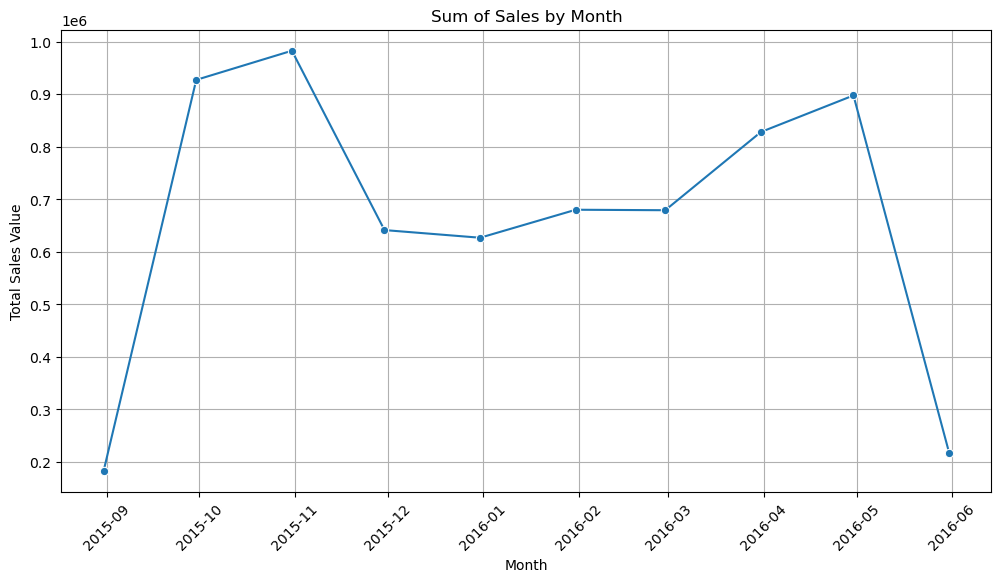

In [21]:
# Ensure the date column is in datetime format
transactions_df['date'] = pd.to_datetime(transactions_df['date'])

# Group by month and calculate the sum of SALES_VALUE
monthly_sales = transactions_df.resample('M', on='date')['SALES_VALUE'].sum()

# Plotting the sum of sales by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, marker='o')
plt.title('Sum of Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()

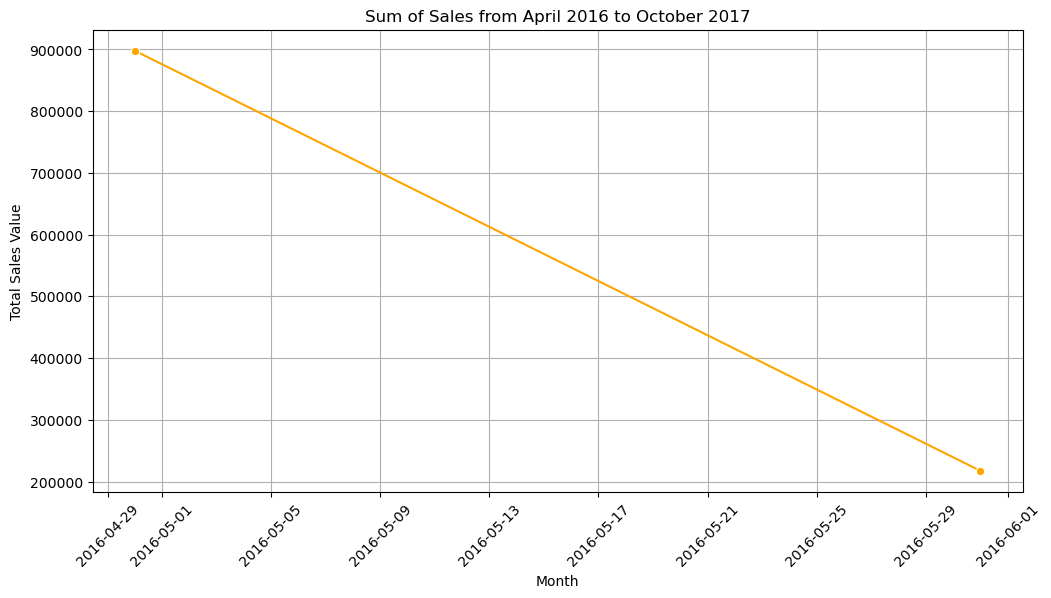

In [11]:
# Filter the data for the specified date range
filtered_sales = transactions_df[(transactions_df['date'] >= '2016-04-01') & (transactions_df['date'] <= '2017-10-31')]

# Group by month and calculate the sum of SALES_VALUE
monthly_filtered_sales = filtered_sales.resample('M', on='date')['SALES_VALUE'].sum()

# Plotting the filtered sum of sales by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_filtered_sales, marker='o', color='orange')




plt.title('Sum of Sales from April 2016 to October 2017')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

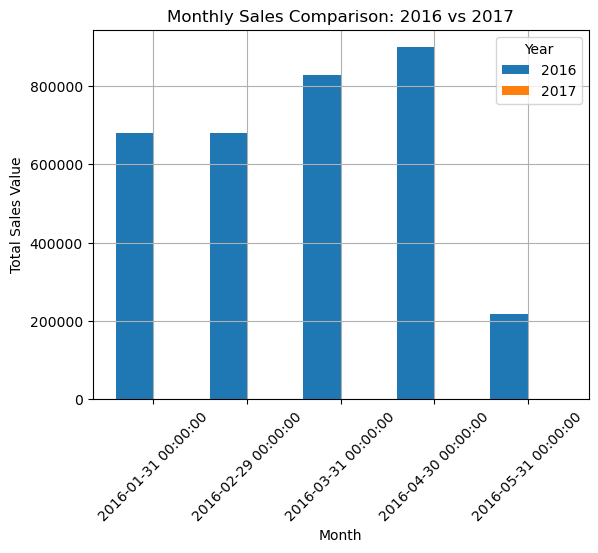

In [12]:
# Group by year and month to calculate the sum of SALES_VALUE for each year
monthly_sales_2016 = transactions_df[transactions_df['date'].dt.year == 2016].resample('M', on='date')['SALES_VALUE'].sum()
monthly_sales_2017 = transactions_df[transactions_df['date'].dt.year == 2017].resample('M', on='date')['SALES_VALUE'].sum()

# Create a DataFrame to compare the two years
monthly_sales_comparison = pd.DataFrame({
    '2016': monthly_sales_2016,
    '2017': monthly_sales_2017
})

# Plotting monthly sales comparison
plt.figure(figsize=(12, 6))
monthly_sales_comparison.plot(kind='bar', width=0.8)





plt.title('Monthly Sales Comparison: 2016 vs 2017')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Year')
plt.show()

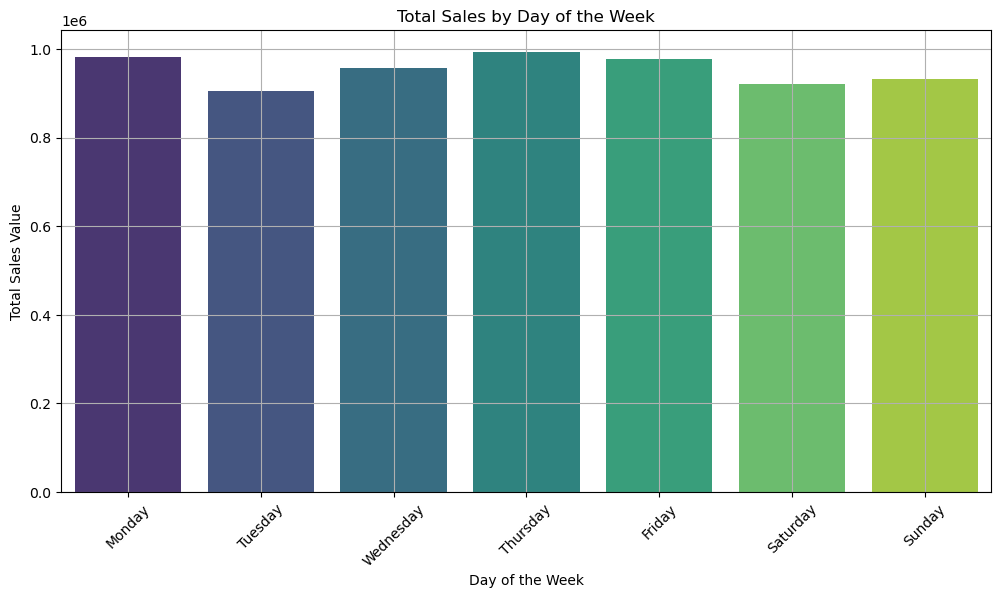

In [13]:
# Create a new column for the day of the week
transactions_df['day_of_week'] = transactions_df['date'].dt.day_name()

# Group by day of the week and calculate the sum of SALES_VALUE
weekly_sales = transactions_df.groupby('day_of_week')['SALES_VALUE'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting total sales by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='viridis')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [27]:
# Read in the hh_demographic.csv file and select the specified columns
demographics = 'hh_demographic.csv'
demographics_df = pd.read_csv(demographics, usecols=['AGE_DESC', 'INCOME_DESC', 'household_key', 'HH_COMP_DESC'])

# Convert appropriate columns to category dtype
demographics_df['AGE_DESC'] = demographics_df['AGE_DESC'].astype('category')
demographics_df['INCOME_DESC'] = demographics_df['INCOME_DESC'].astype('category')
demographics_df['HH_COMP_DESC'] = demographics_df['HH_COMP_DESC'].astype('category')

print(demographics_df.head())

  AGE_DESC INCOME_DESC      HH_COMP_DESC  household_key
0      65+      35-49K  2 Adults No Kids              1
1    45-54      50-74K  2 Adults No Kids              7
2    25-34      25-34K     2 Adults Kids              8
3    25-34      75-99K     2 Adults Kids             13
4    45-54      50-74K     Single Female             16


In [28]:
# Group the transactions DataFrame by household_key and calculate the sum of SALES_VALUE
household_sales = transactions_df.groupby('household_key')['SALES_VALUE'].sum().reset_index()

print(household_sales.head())

   household_key  SALES_VALUE
0              1      4330.16
1              2      1954.34
2              3      2653.21
3              4      1200.11
4              5       779.06


In [29]:
# Join the demographics DataFrame to the aggregated transactions table
merged_df = household_sales.merge(demographics_df, on='household_key', how='inner')

print(merged_df.head())

   household_key  SALES_VALUE AGE_DESC INCOME_DESC      HH_COMP_DESC
0              1      4330.16      65+      35-49K  2 Adults No Kids
1              7      3400.05    45-54      50-74K  2 Adults No Kids
2              8      5534.97    25-34      25-34K     2 Adults Kids
3             13     13190.92    25-34      75-99K     2 Adults Kids
4             16      1512.02    45-54      50-74K     Single Female


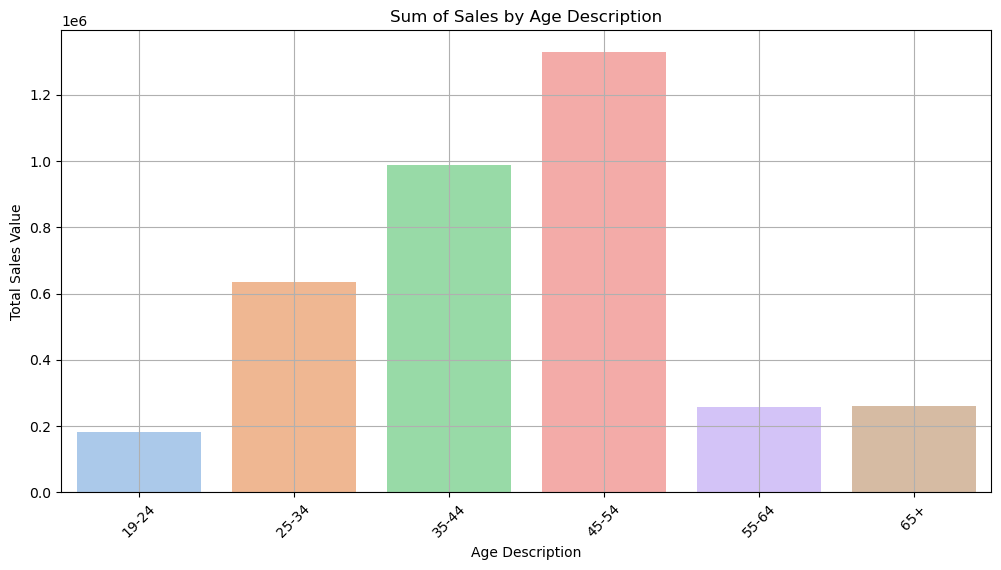

In [30]:
# Plotting the sum of sales by AGE_DESC
age_sales = merged_df.groupby('AGE_DESC')['SALES_VALUE'].sum().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=age_sales.index, y=age_sales.values, palette='pastel')
plt.title('Sum of Sales by Age Description')
plt.xlabel('Age Description')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()

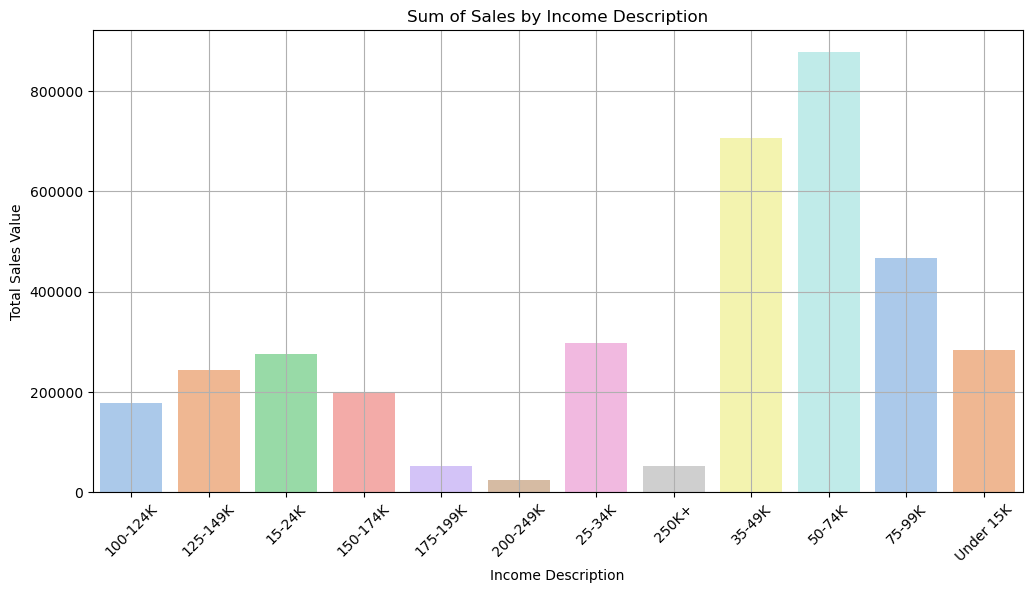

In [32]:
# Plotting the sum of sales by INCOME_DESC
income_sales = merged_df.groupby('INCOME_DESC')['SALES_VALUE'].sum().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=income_sales.index, y=income_sales.values, palette='pastel')

plt.title('Sum of Sales by Income Description')
plt.xlabel('Income Description')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [31]:
pivot_table = merged_df.pivot_table(values='SALES_VALUE', index='AGE_DESC', columns='HH_COMP_DESC', aggfunc='mean')

print(pivot_table)

highest_average_sales = pivot_table.mean(axis=1).idxmax()
highest_average_value = pivot_table.mean(axis=1).max()

print(f"The demographic with the highest average sales is: {highest_average_sales} with an average sales value of {highest_average_value:.2f}.")

HH_COMP_DESC  1 Adult Kids  2 Adults Kids  2 Adults No Kids  Single Female  \
AGE_DESC                                                                     
19-24          7268.796667    5428.945000       4020.800000    4576.095556   
25-34          5512.196875    5753.973514       5638.515833    4807.440588   
35-44          6297.737778    6691.772264       6260.412444    6015.192069   
45-54          6632.569167    6610.484490       5839.527027    4549.365405   
55-64          3064.870000    4695.655000       5752.413684    4816.148462   
65+            4040.810000    5536.866667       4614.108571    4059.699412   

HH_COMP_DESC  Single Male      Unknown  
AGE_DESC                                
19-24         3216.835000  4911.275000  
25-34         4909.522381  7356.270000  
35-44         4844.192000  4227.691818  
45-54         4636.637083  4843.995682  
55-64         3922.546250  7973.750000  
65+           3871.556000  2879.290000  
The demographic with the highest average sales 

# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [38]:
product_file_path = 'product.csv'
product_df = pd.read_csv(product_file_path, usecols=['PRODUCT_ID', 'DEPARTMENT'])


product_df['PRODUCT_ID'] = product_df['PRODUCT_ID'].astype('category')
product_df['DEPARTMENT'] = product_df['DEPARTMENT'].astype('category')


print(product_df.head())

  PRODUCT_ID    DEPARTMENT
0      25671       GROCERY
1      26081  MISC. TRANS.
2      26093        PASTRY
3      26190       GROCERY
4      26355       GROCERY


In [54]:
transactions_with_products = pd.merge(transactions_df, product_df, on='PRODUCT_ID', how='inner')

full_data = pd.merge(transactions_with_products, demographics_df, on='household_key', how='inner')
print(full_data.head())

   household_key    BASKET_ID PRODUCT_ID  QUANTITY  SALES_VALUE       date  \
0           1364  26984896261     842930         1         2.19 2016-01-01   
1           1364  26984896261     897044         1         2.99 2016-01-01   
2           1364  32305198058     897044         1         2.99 2016-04-16   
3           1364  35665305476     897044         1         2.99 2016-01-16   
4           1364  26984896261     920955         1         3.09 2016-01-01   

  day_of_week DEPARTMENT AGE_DESC INCOME_DESC   HH_COMP_DESC  
0      Friday    GROCERY      65+    100-124K  Single Female  
1      Friday    GROCERY      65+    100-124K  Single Female  
2    Saturday    GROCERY      65+    100-124K  Single Female  
3    Saturday    GROCERY      65+    100-124K  Single Female  
4      Friday       MEAT      65+    100-124K  Single Female  


In [57]:
full_data['AGE_DESC'] = full_data['AGE_DESC'].astype('category').cat.as_ordered()

pivot_table_product_demo = full_data.pivot_table(values='SALES_VALUE', index='AGE_DESC', columns='DEPARTMENT', aggfunc='sum')

# Display the pivot tabl
print(pivot_table_product_demo)

youngest_demographic = pivot_table_product_demo.loc[pivot_table_product_demo.index == pivot_table_product_demo.index.min()]

best_performing_category = youngest_demographic.idxmax(axis=1).values[0]
best_sales_value = youngest_demographic.max(axis=1).values[0]

print(f"The category where our youngest demographic performs well is: {best_performing_category} with a total sales value of {best_sales_value:.2f}.")

DEPARTMENT       AUTOMOTIVE  CHARITABLE CONT  CHEF SHOPPE  CNTRL/STORE SUP  \
AGE_DESC                                                                     
19-24       0.0       11.64              0.0        81.30             2.00   
25-34       0.0       21.25              0.0       134.16             0.00   
35-44       0.0       72.58              0.0       348.53             1.00   
45-54       0.0       55.92              0.0       418.24             9.95   
55-64       0.0        0.00              0.0        80.86             2.00   
65+         0.0       16.37              0.0       149.24             0.10   

DEPARTMENT  COSMETICS  COUP/STR & MFG  DAIRY DELI      DELI  DELI/SNACK BAR  \
AGE_DESC                                                                      
19-24          698.63            7.49        3.80   4043.30            0.00   
25-34         2273.03           48.42        3.85  18181.94            0.00   
35-44         4362.02          121.20        7.39  34577.29

# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [ ]:
with pd.ExcelWriter('pivot_table_product_demo.xlsx') as writer: 
    pivot_table_product_demo.to_excel(writer, sheet_name='PivotTable') 
print("Pivot table exported successfully!")